In [21]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Cement-strength-prediction-project/main/cement_data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
col_names = df.columns.tolist()
col_names

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

In [4]:
col_names[0].split("(")

['Cement ', 'component 1)', 'kg in a m^3 mixture)']

In [5]:
col_names = [i.split("(")[0] for i in col_names]

In [6]:
df.columns = col_names
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [9]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [10]:
df.duplicated().sum()

25

In [11]:
df[df.duplicated() == True]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [12]:
df.drop_duplicates(keep = 'first',inplace=True)
df.duplicated().sum()

0

In [13]:
df.reset_index(drop=True,inplace=True)
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


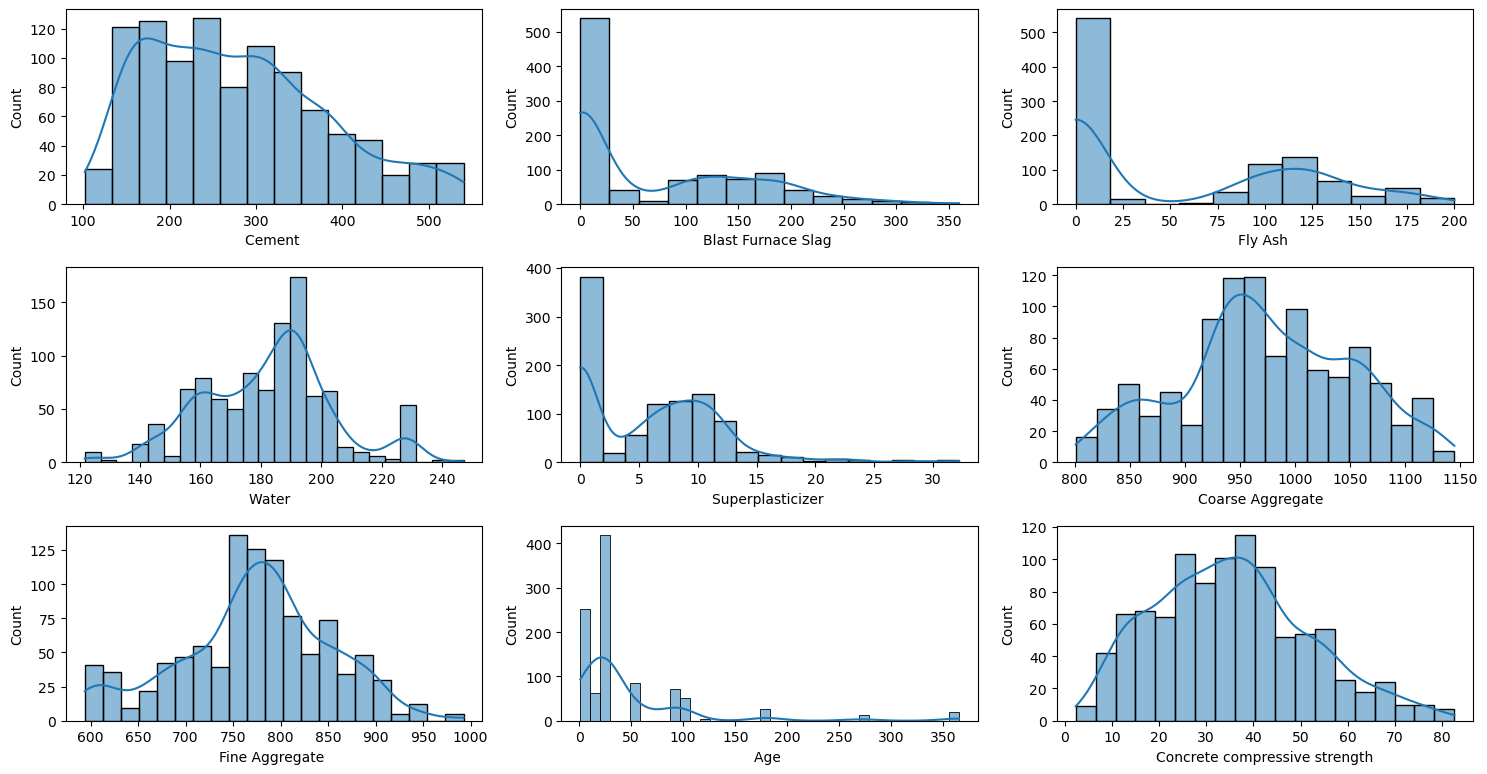

In [14]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(df[i],kde=True)
    plt.xlabel(i,fontsize = 10)
    plotnumber += 1
plt.tight_layout()
plt.show()

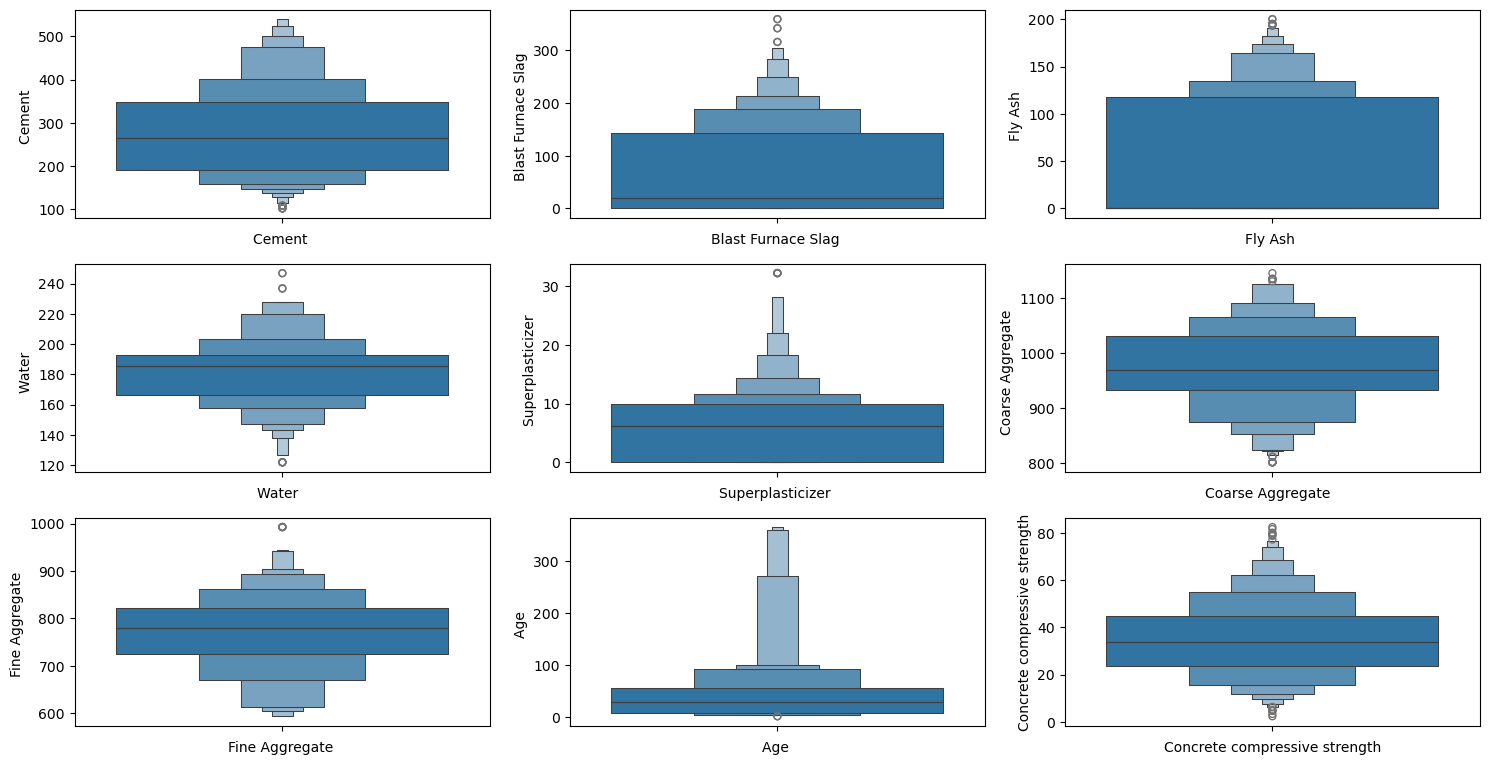

In [15]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxenplot(df[i])
    plt.xlabel(i,fontsize = 10)
    plotnumber += 1
plt.tight_layout()
plt.show()

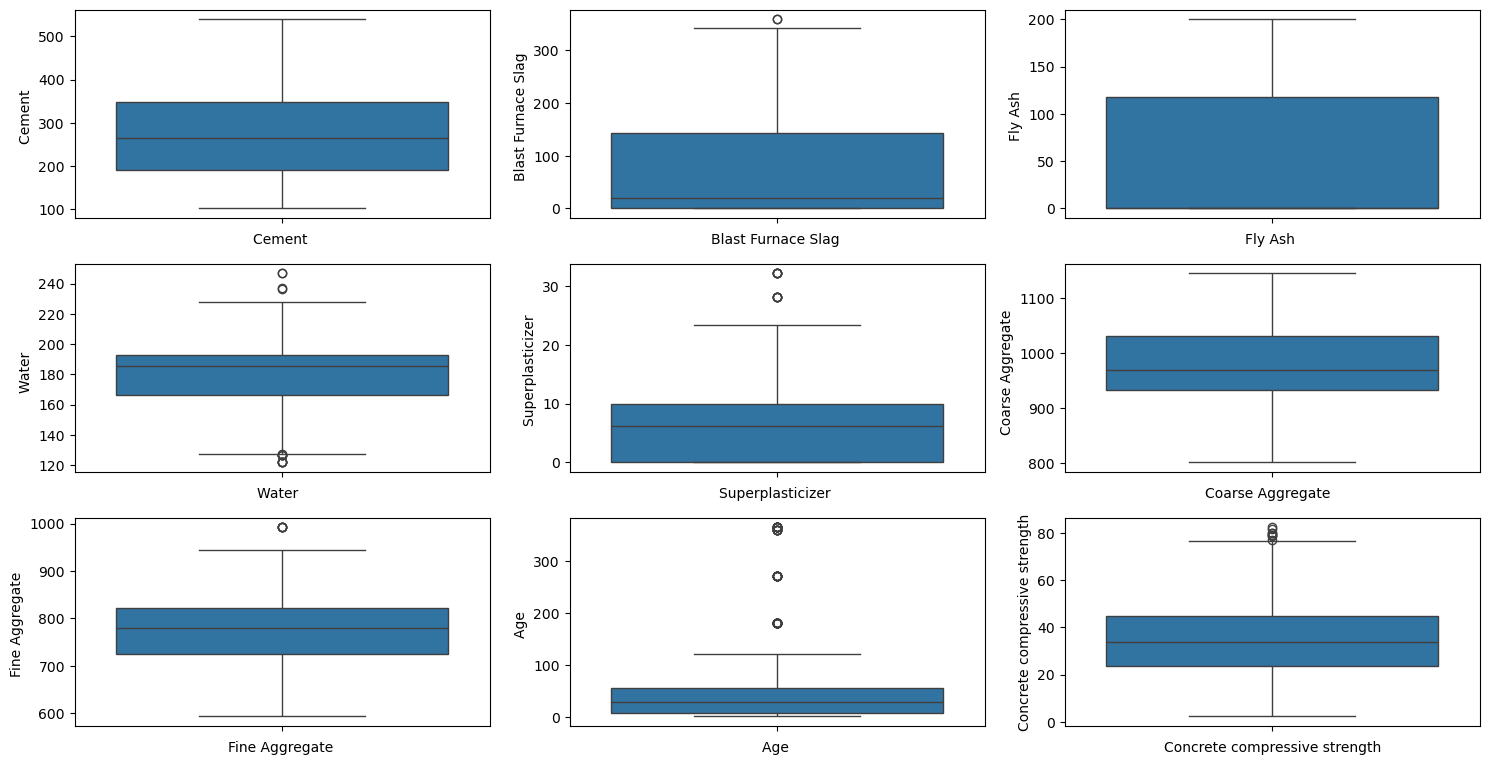

In [16]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize = 10)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water  ',
       'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age ',
       'Concrete compressive strength'],
      dtype='object')

In [18]:
outliers = ['Blast Furnace Slag ','Water  ','Superplasticizer ','Fine Aggregate ', 'Age ','Concrete compressive strength']

In [22]:
def outlier_capping(dataframe : pd.DataFrame,outlier:list):
    df = dataframe.copy()
    for i in outliers:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        
        iqr = q3 - q1 
        
        upper_limit = q3 + 1.5*iqr
        lower_limit = q1 - 1.5*iqr
        
        df.loc[df[i]>upper_limit, i] = upper_limit
        df.loc[df[i]<lower_limit, i] = lower_limit
    return df

df = outlier_capping(dataframe=df,outlier=outliers)

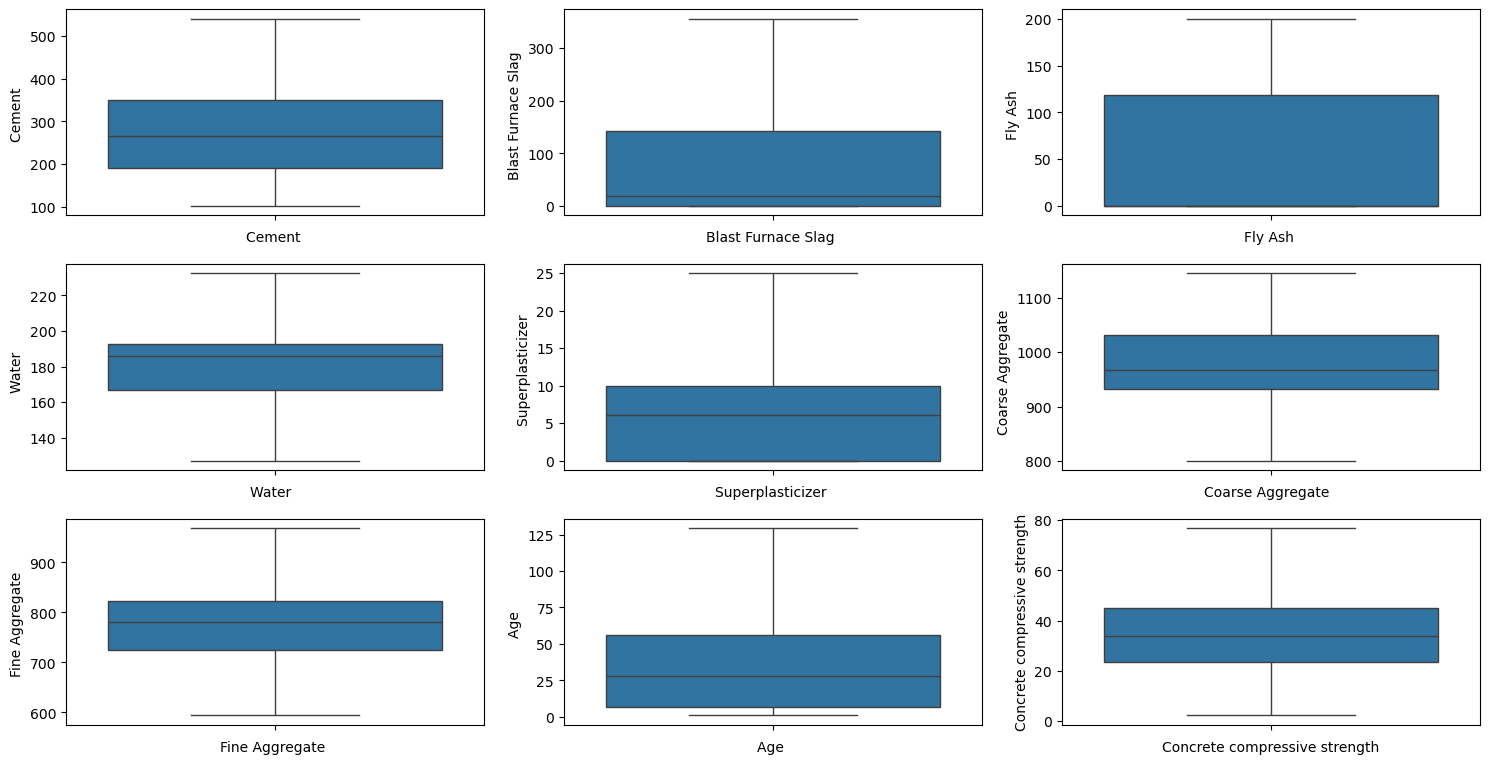

In [23]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize = 10)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [24]:
x = df.drop('Concrete compressive strength',axis=1)
y = df['Concrete compressive strength']

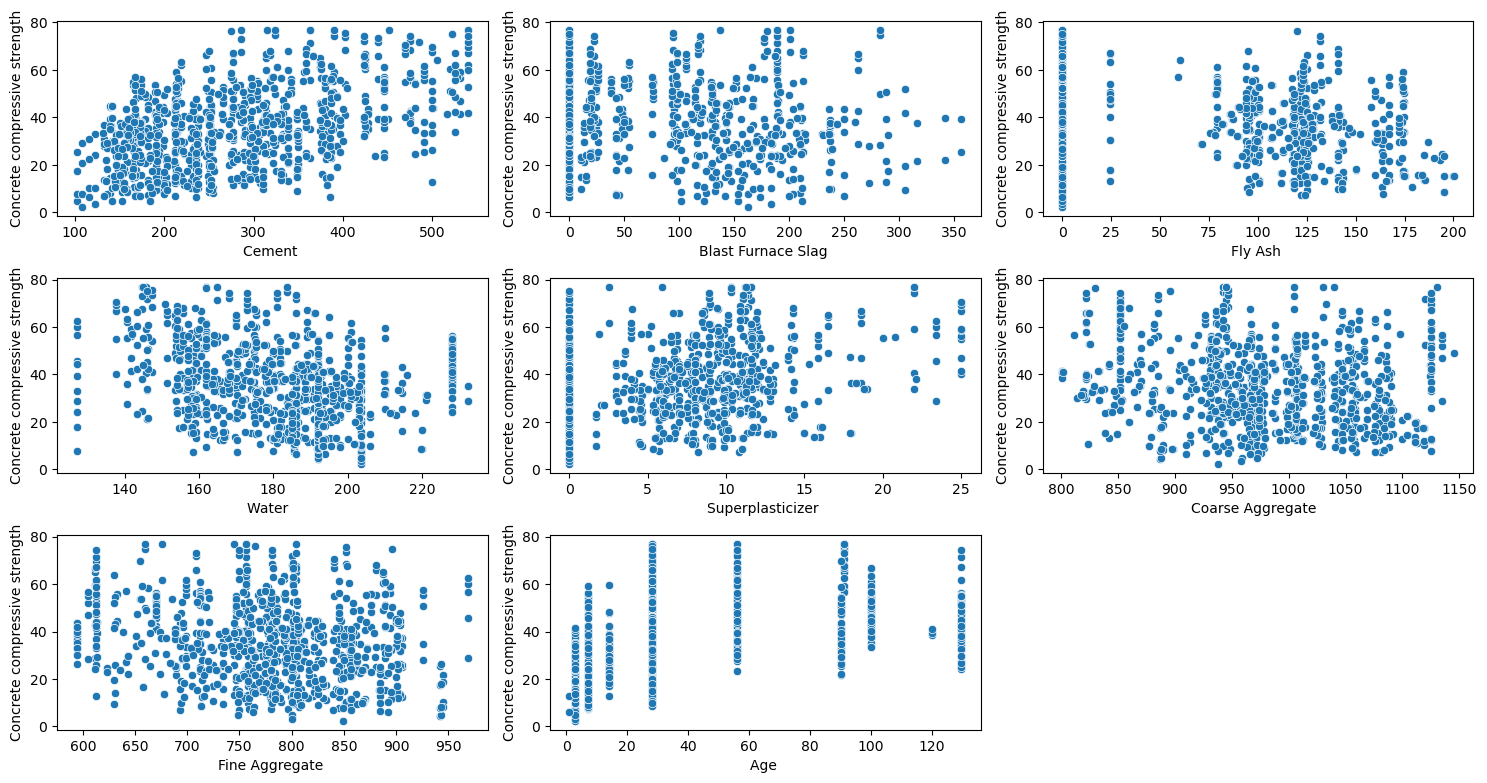

In [28]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber = 1
for i in x.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.scatterplot(x=df[i],y=y)
    plt.xlabel(i,fontsize = 10)
    plotnumber += 1
plt.tight_layout()
plt.show()

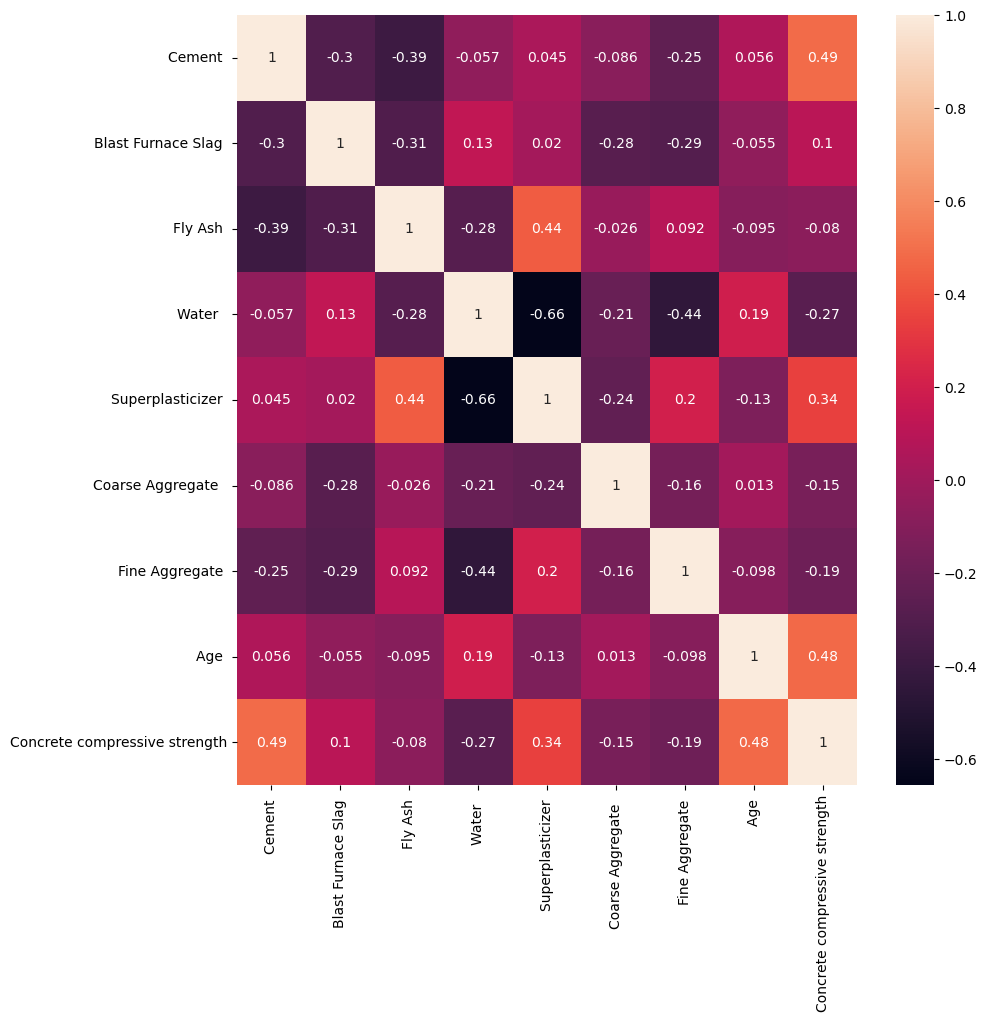

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
def check_model_performance(preprocessor,x_train,y_train,x_test,y_test):
    models = {
        "Linear Regression" : LinearRegression(),
        "Ridge Regression" : Ridge(alpha=1),
        "Lasso Regression" : Lasso(alpha=1),
        "Random Forest Regression" : RandomForestRegressor(max_depth=5),
        "Gradient Boosting Regression" : GradientBoostingRegressor(learning_rate=0.1)
    }
    
    for model_name,model in models.items():
        pipeline = make_pipeline(preprocessor,model)
        pipeline.fit(x_train,y_train)
        y_pred = pipeline.predict(x_test)
        
        mse = mean_squared_error(y_test,y_pred)
        
        r2 = r2_score(y_test,y_pred)
        
        print(f"{model_name} - Mean Squared Error = {mse:.2f} \n{model_name} - r2_score = {r2:.2f}",end="\n\n" )

In [48]:
preprocessor_01 = make_pipeline(KNNImputer(n_neighbors=3),StandardScaler())
preprocessor_02 = make_pipeline(KNNImputer(n_neighbors=3),MinMaxScaler())
preprocessor_03 = make_pipeline(KNNImputer(n_neighbors=3),RobustScaler())

print(f"{'=' * 10} Result for StandardScaler {'=' *10}")
check_model_performance(preprocessor_01, x_train, y_train, x_test, y_test)

print(f"\n{'=' * 10} Result for MinMaxScaler {'=' *10}")
check_model_performance(preprocessor_02, x_train, y_train, x_test, y_test)

print(f"\n{'=' * 10} Result for RobustScaler {'=' *10}")
check_model_performance(preprocessor_03, x_train, y_train, x_test, y_test)

========== Result for StandardScaler ==========
Linear Regression - Mean Squared Error = 88.36 
Linear Regression - r2_score = 0.69

Ridge Regression - Mean Squared Error = 88.23 
Ridge Regression - r2_score = 0.69

Lasso Regression - Mean Squared Error = 99.91 
Lasso Regression - r2_score = 0.65

Random Forest Regression - Mean Squared Error = 48.29 
Random Forest Regression - r2_score = 0.83

Gradient Boosting Regression - Mean Squared Error = 30.70 
Gradient Boosting Regression - r2_score = 0.89


========== Result for MinMaxScaler ==========
Linear Regression - Mean Squared Error = 88.36 
Linear Regression - r2_score = 0.69

Ridge Regression - Mean Squared Error = 88.06 
Ridge Regression - r2_score = 0.69

Lasso Regression - Mean Squared Error = 176.81 
Lasso Regression - r2_score = 0.37

Random Forest Regression - Mean Squared Error = 50.44 
Random Forest Regression - r2_score = 0.82

Gradient Boosting Regression - Mean Squared Error = 30.66 
Gradient Boosting Regression - r2_scor

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[100,200],
    "learning_rate":[0.1,0.01],
    "max_depth":[5,3,7],
    "min_samples_split":[2,4],
    "min_samples_leaf":[1,2,3],
}

gb_rg = GradientBoostingRegressor()

grid = GridSearchCV(gb_rg, param_grid, scoring='neg_mean_squared_error', cv = 5, verbose = 3)

grid.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-20.177 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-19.716 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-27.311 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-21.286 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-24.966 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-18.892 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score

[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-25.642 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-18.050 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-28.154 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-29.712 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-34.919 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-20.175 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-16.241 total time=   0.0s
[CV 3/5] END learning_rate=0.1, ma

[CV 1/5] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-18.266 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-23.855 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-32.529 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-26.708 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-28.512 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-17.898 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-23.804 total time=   0.2s
[CV 3/5] END learning_rate=0.1, ma

[CV 2/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-66.101 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-80.626 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-68.392 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-77.868 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-41.746 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-34.505 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-46.058 total time=   0.1s
[CV 4/5] END learning_rate=

[CV 3/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-106.888 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-96.520 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-110.688 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-69.376 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-50.611 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-65.700 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-60.244 total time=   0.1s
[CV 5/5] END learning_rat

[CV 2/5] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-63.305 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-73.032 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-60.639 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-64.926 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-29.868 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-32.608 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-43.530 total time=   0.2s
[CV 4/5] END learning_rate=

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [5, 3, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=3)

In [51]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [52]:
grid.best_score_

-21.417735376662556

In [54]:
grid.best_estimator_.score(x_test,y_test)

0.9257133136159678

In [59]:
y_pred = grid.predict(x_test)

In [60]:
mean_squared_error(y_test,y_pred)

20.95484265601952